# Dataset
For this homework, we'll use the Car Fuel Efficiency dataset.

You can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-09-17 23:33:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv


Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-09-17 23:33:14 (23.8 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



## Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369

## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

ANSWER: NO, it looks like a normal distribution.

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

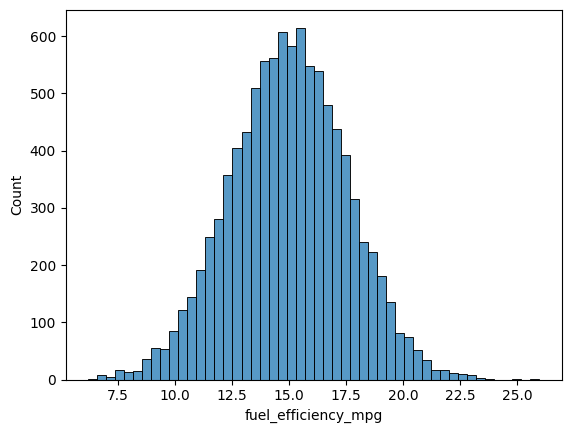

In [5]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

#### Question 1
There's one column with missing values. What is it?

ANSWER: horsepower

In [6]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

#### Question 2
What's the median (50% percentile) for variable 'horsepower'?

ANSWER: 149

In [7]:
df.describe()

engine_displacement   horsepower  vehicle_weight   model_year  \
count          9704.000000  8996.000000     9704.000000  9704.000000   
mean            199.708368   149.657292     3001.280993  2011.484027   
std              49.455319    29.879555      497.894860     6.659808   
min              10.000000    37.000000      952.681761  2000.000000   
25%             170.000000   130.000000     2666.248985  2006.000000   
50%             200.000000   149.000000     2993.226296  2012.000000   
75%             230.000000   170.000000     3334.957039  2017.000000   
max             380.000000   271.000000     4739.077089  2023.000000   

       fuel_efficiency_mpg  
count          9704.000000  
mean             14.985243  
std               2.556468  
min               6.200971  
25%              13.267459  
50%              15.006037  
75%              16.707965  
max              25.967222

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [8]:
np.random.seed = 42

n = len(df) # Number of observations

# Establish % of data for each set
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n- n_val - n_test

idx = np.arange(n) # Index to shuffle data

np.random.shuffle(idx) # Shuffling index

# Partition data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.head()

engine_displacement  horsepower  vehicle_weight  model_year  \
3792                  220       157.0     2928.786759        2007   
8129                  150       146.0     3221.346963        2003   
4946                  250       155.0     2363.242201        2007   
162                   140       130.0     3430.301838        2007   
4454                  180       136.0     3262.087887        2019   

      fuel_efficiency_mpg  
3792            15.328858  
8129            13.668556  
4946            17.868242  
162             12.148450  
4454            13.121923

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
-  Round the RMSE scores to 2 decimal digits using round(score, 2)
-  Which option gives better RMSE?

ANSWER: filled with 0s.

In [9]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)



In [10]:
# Resetting indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train_fill0 = df_train.copy()
X_train_fillMean = df_train.copy()

X_train_fill0.horsepower = df_train.horsepower.fillna(0)
X_train_fillMean.horsepower = df_train.horsepower.fillna(df_train.horsepower.mean())

In [11]:
w0_fill0, w_fill0 = train_linear_regression(X_train_fill0, y_train)
w0_fillMean, w_fillMean = train_linear_regression(X_train_fillMean, y_train)

y_pred_fill0 = w0_fill0 + df_val.dot(w_fill0)
y_pred_fillMean = w0_fillMean + df_val.dot(w_fillMean)

In [12]:
rmse_0 = round(rmse(y_val, y_pred_fill0),2)
rmse_mean = round(rmse(y_val,y_pred_fillMean),2)

print('RMSE for datset filled with 0:', rmse_0)
print('RMSE for datset filled with mean:', rmse_mean)

RMSE for datset filled with 0: 0.51
RMSE for datset filled with mean: 0.47


#### Question 4
Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
*If there are multiple options, select the smallest r.

ANSWER: r = 0

In [13]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [14]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train.fillna(0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),3)

    print('r =', r, '   rmse = ',score)



r = 0    rmse =  0.525
r = 0.01    rmse =  0.524
r = 0.1    rmse =  0.526
r = 1    rmse =  0.53
r = 5    rmse =  0.531
r = 10    rmse =  0.531
r = 100    rmse =  0.531


#### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

ANSWER: 0.008 ≈ 0.006

In [15]:
df.horsepower = df.horsepower.fillna(0)

seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = np.zeros(len(seed))
i=0

for s in seed:
    np.random.seed = seed[i]
    np.random.shuffle(idx) # Shuffling index

    # Partition data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # Resetting indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    w0, w = train_linear_regression(df_train, y_train)

    X_val = df_val.fillna(0)
    y_pred = w0 + X_val.dot(w)
    scores[i] = rmse(y_val, y_pred)

    i = i+1

In [16]:
print(scores)

[0.52101876 0.51317734 0.51291664 0.51918809 0.5152933  0.51605509
 0.52469714 0.51234539 0.5177201  0.51225402]


In [17]:
stdev = np.std(scores)
print('The standard deviation of seeds is: ', round(stdev,3))

The standard deviation of seeds is:  0.004


#### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

ANSWER: 0.519 ≈ 0.515

In [22]:
df.horsepower = df.horsepower.fillna(0)

seed = 9

np.random.seed = seed
np.random.shuffle(idx) # Shuffling index

# Partition data
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

# Resetting indexes
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w0, w = train_linear_regression_reg(df_train, y_train, r = 0.001)

y_pred = w0 + df_test.dot(w)
score = rmse(y_test, y_pred)

print('The score rmse in test datset with seed 9 is: ', round(score,3))

The score rmse in test datset with seed 9 is:  0.519
